In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [9]:
dataset = np.random.exponential(.1,size=100)

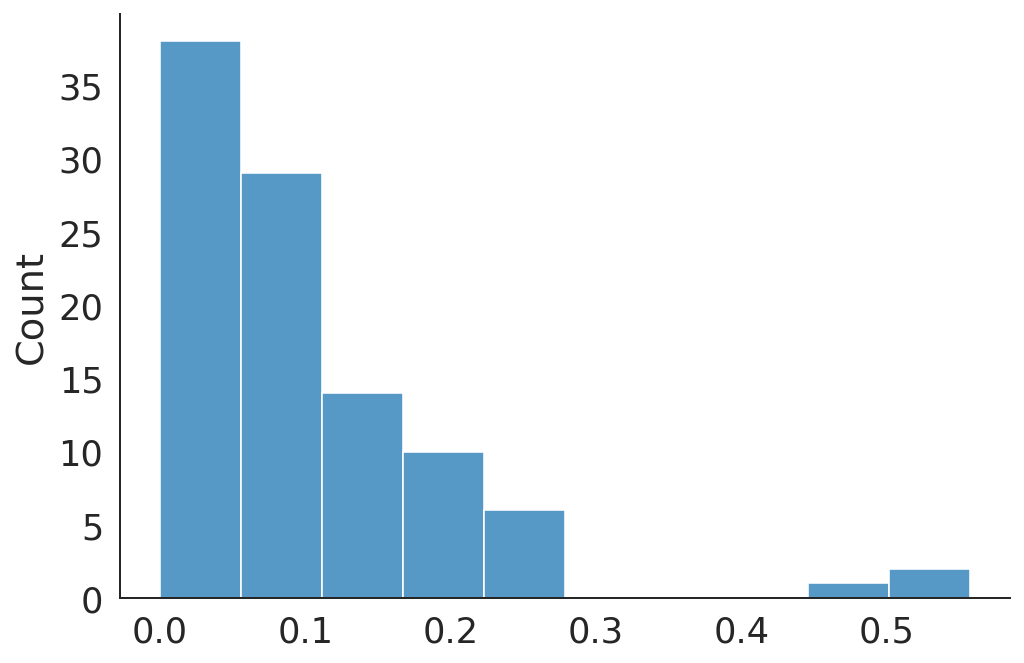

In [10]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(dataset, kind="hist", bins = 10, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
burr,295.454253,93.641633,126.755063,inf
gamma,302.105707,106.373869,124.376190,inf
beta,302.432431,88.625461,129.089451,inf
lognorm,318.970744,96.618335,129.808431,inf
norm,493.161143,266.536791,168.776920,inf


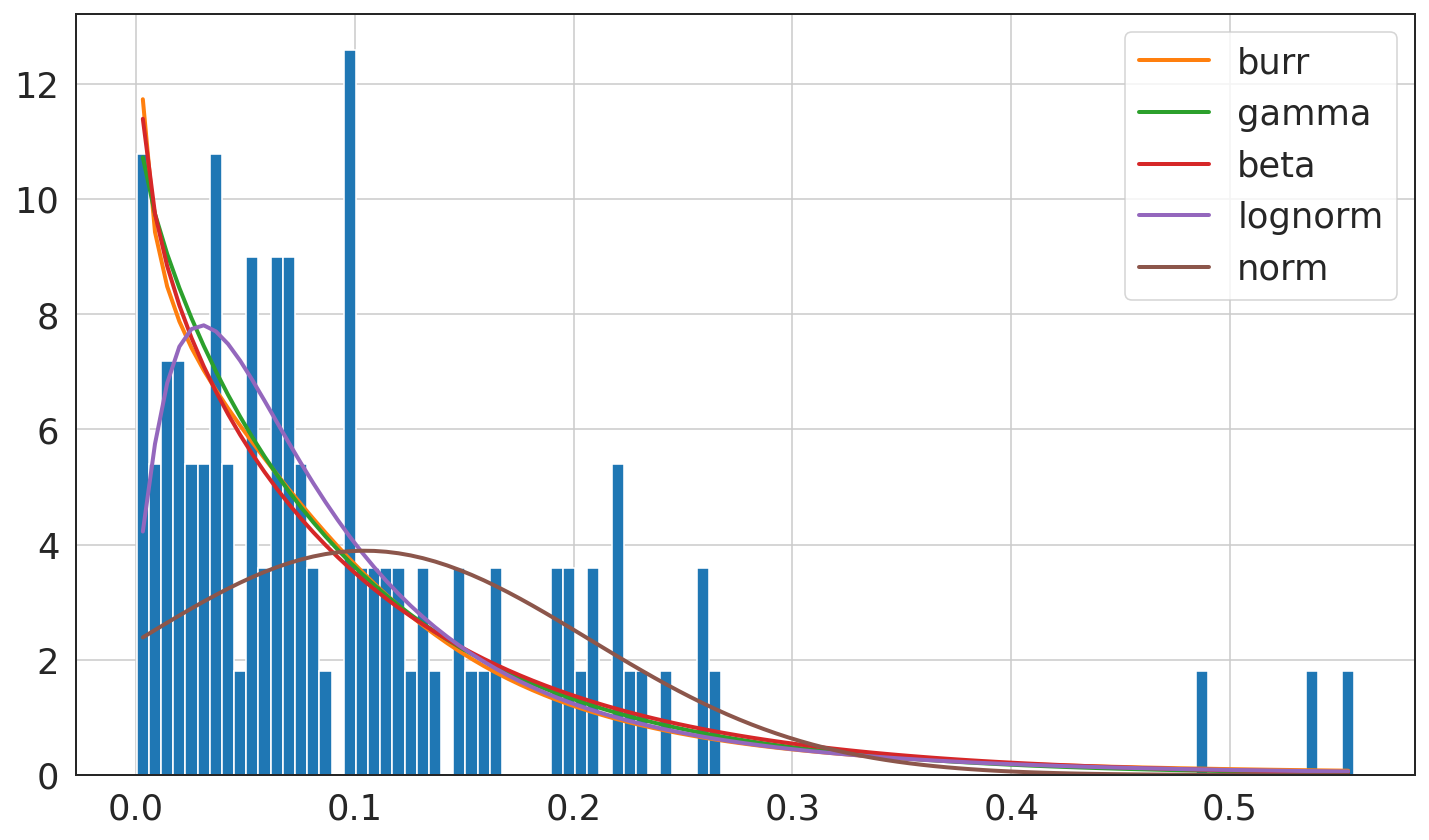

In [11]:
f = Fitter(dataset,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [13]:
dp = f.get_best(method = 'sumsquare_error')
dp

{'burr': {'c': 2.220545335229316,
  'd': 0.36139791754302014,
  'loc': 0.0004111866543663787,
  'scale': 0.15040530332282892}}

In [14]:
dp['burr']['c']

2.220545335229316

,sumsquare_error,aic,bic,kl_div
expon,291.509112,86.031170,116.200448,inf
gamma,302.105707,106.373869,124.376190,inf
chi2,304.670897,70.223652,125.221709,inf
lognorm,318.970744,96.618335,129.808431,inf
exponpow,332.703551,-3.382996,134.023677,inf


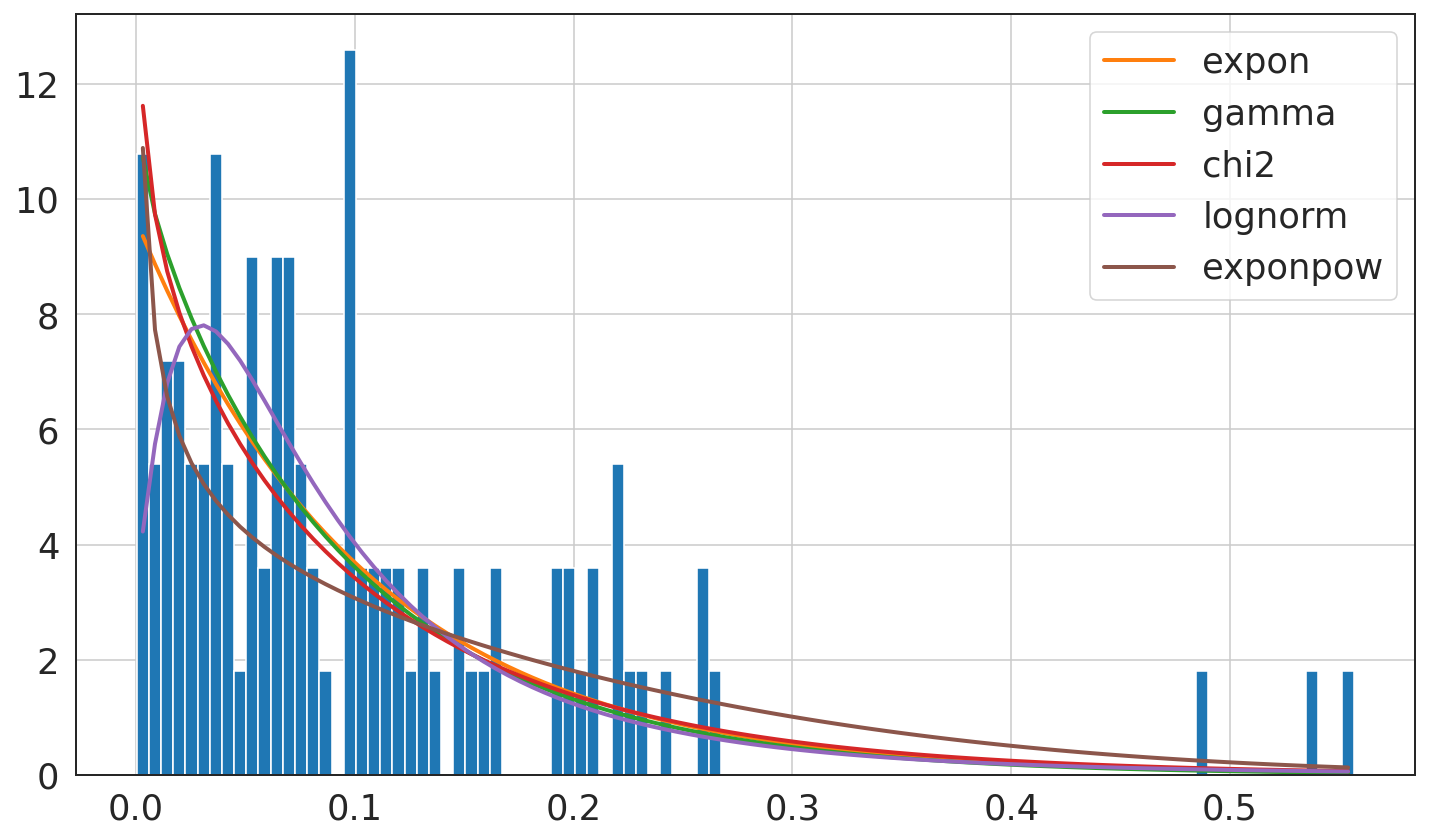

In [15]:
f = Fitter(dataset,
           distributions=get_common_distributions()
          )
f.fit()
f.summary()

In [16]:
dp = f.get_best(method = 'sumsquare_error')
dp

{'expon': {'loc': 0.00041118665436637875, 'scale': 0.10406563721469715}}